# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

---

# Load Dataset

In [4]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


# Quick Description of all attributes

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

# Data Exploration

**Numerical attributes:**
1. Age
2. Height(cm)
3. Weight(kg)
4. Vege_day
5. Meals_day
6. Water_intake(L)
7. Exercise
8. Income

**Categorical attributes:**
1. Gender
2. Family_history
3. Alcohol
4. Junk_food
5. Snack
6. Smoking
7. Transportation
8. TV
9. Discipline

**Output label:**
1. Cardiovascular_risk(y)


In [6]:
dataset.describe(include="all")

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
count,2100,2100.000000,2100.000000,2100.000000,2100,2100,2100,2100.000000,2100.000000,2100,2100,2100.000000,2100,2100.000000,2100,2100.000000,2100,2100
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,2,NaN,5,NaN,3,NaN,2,3
top,Male,NaN,NaN,NaN,yes,low,yes,NaN,NaN,Sometimes,no,NaN,bus,NaN,rare,NaN,no,high
freq,1060,NaN,NaN,NaN,1715,1394,1855,NaN,NaN,1754,2056,NaN,1573,NaN,947,NaN,2004,967
mean,NaN,24.302381,170.148286,86.561571,NaN,NaN,NaN,2.423333,2.687143,NaN,NaN,2.007429,NaN,1.006190,NaN,9432.386190,NaN,NaN
std,NaN,6.342270,9.340941,26.192242,NaN,NaN,NaN,0.584318,0.810088,NaN,NaN,0.613122,NaN,0.894885,NaN,5002.350673,NaN,NaN
min,NaN,14.000000,145.000000,39.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,NaN,1000.000000,NaN,NaN
25%,NaN,20.000000,163.000000,65.400000,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN,1.577500,NaN,0.000000,NaN,4994.500000,NaN,NaN
50%,NaN,23.000000,170.000000,83.000000,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,9226.500000,NaN,NaN
75%,NaN,26.000000,176.800000,107.250000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,2.480000,NaN,2.000000,NaN,13841.750000,NaN,NaN


---

# Plot Histograms for each numerical attributes

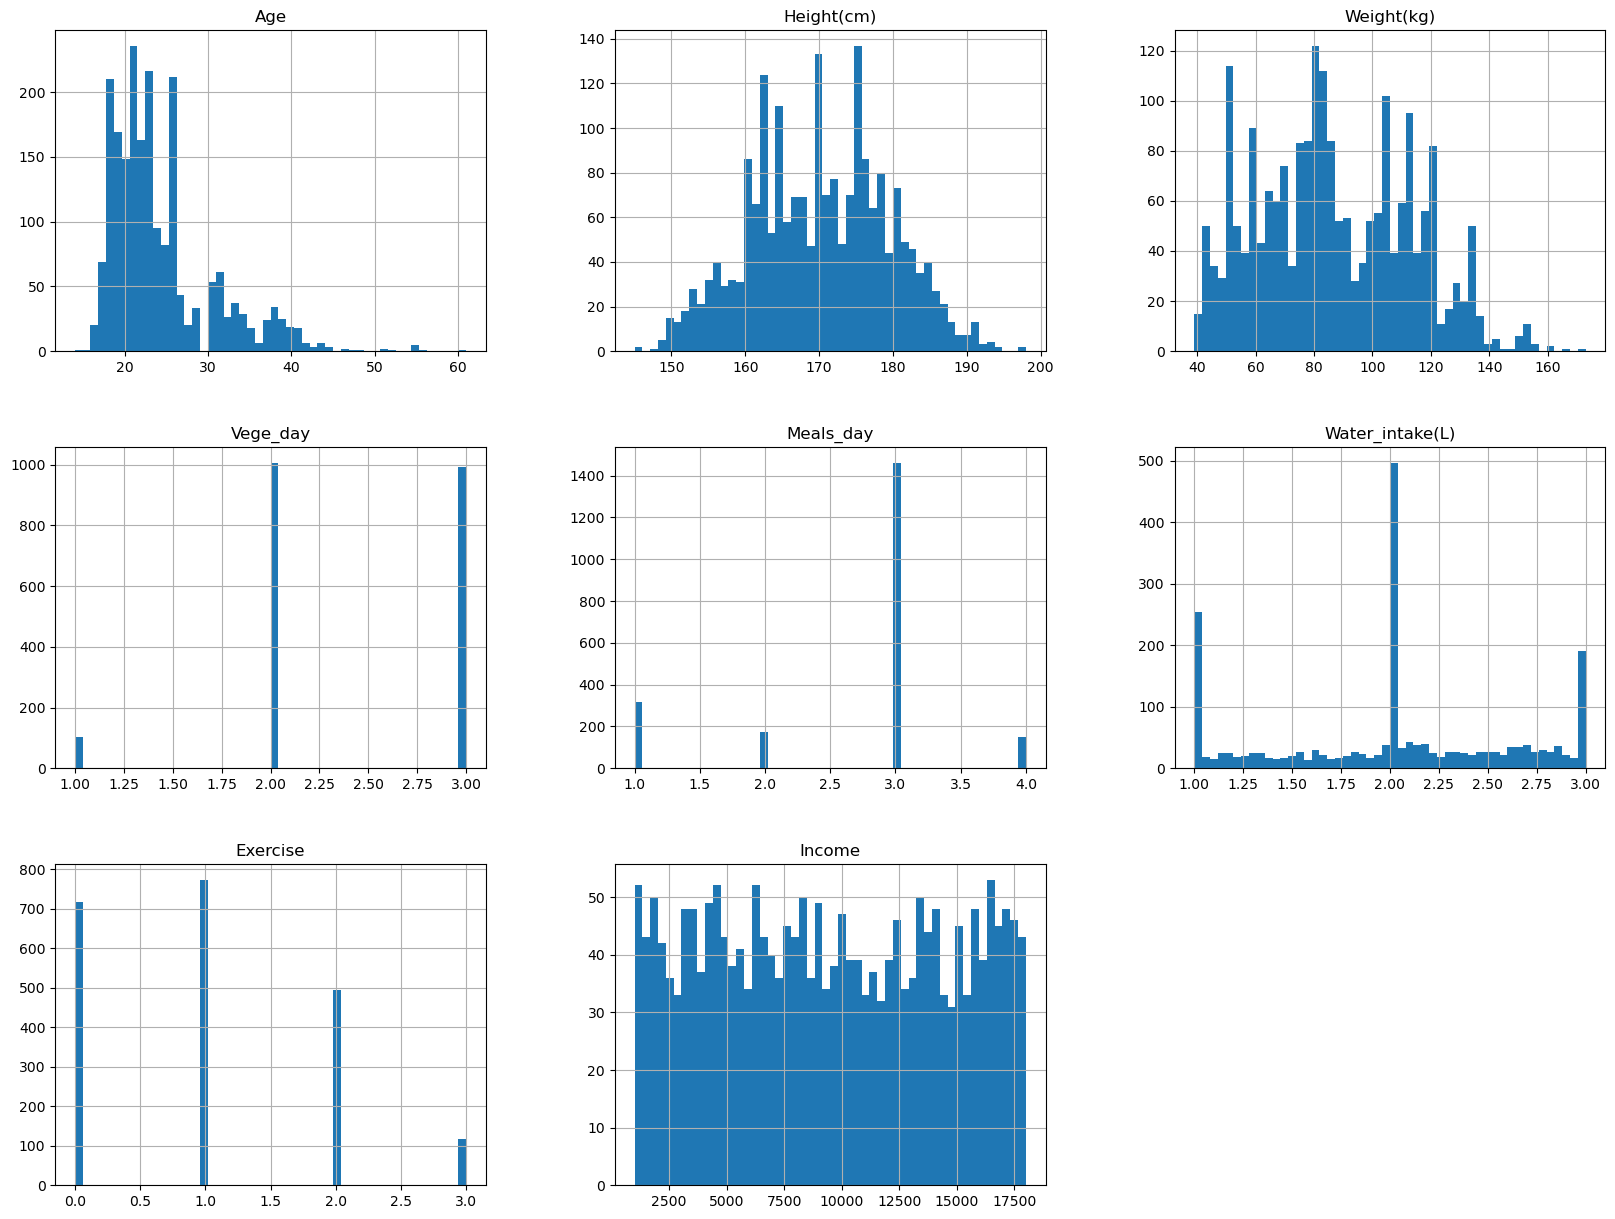

In [7]:
dataset.hist(bins=50,figsize=(20,15))
plt.show()

# Plot Bar Graphs for each categorical attributes

In [8]:
def plot_categorical_bargraphs(dataframe):
    # Get a list of all categorical columns
    categorical_columns = dataframe.select_dtypes(include=["object"]).columns
    plt.figure(figsize=(15, 20))
    
    # Loop through each categorical column and plot a bar graph
    for i,column in enumerate(categorical_columns,1):
        # Calculate the frequency of each category
        category_counts = dataframe[column].value_counts()

        # Create a bar graph
        
        plt.subplot(5,2,i)
        ax = category_counts.plot(kind='bar', color=cm.Blues(np.linspace(0.4, 0.2, len(category_counts))))
        plt.title("Bar Graph for {}".format(column))
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.xticks(rotation=0)

        # Add text labels for exact values on top of each bar
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

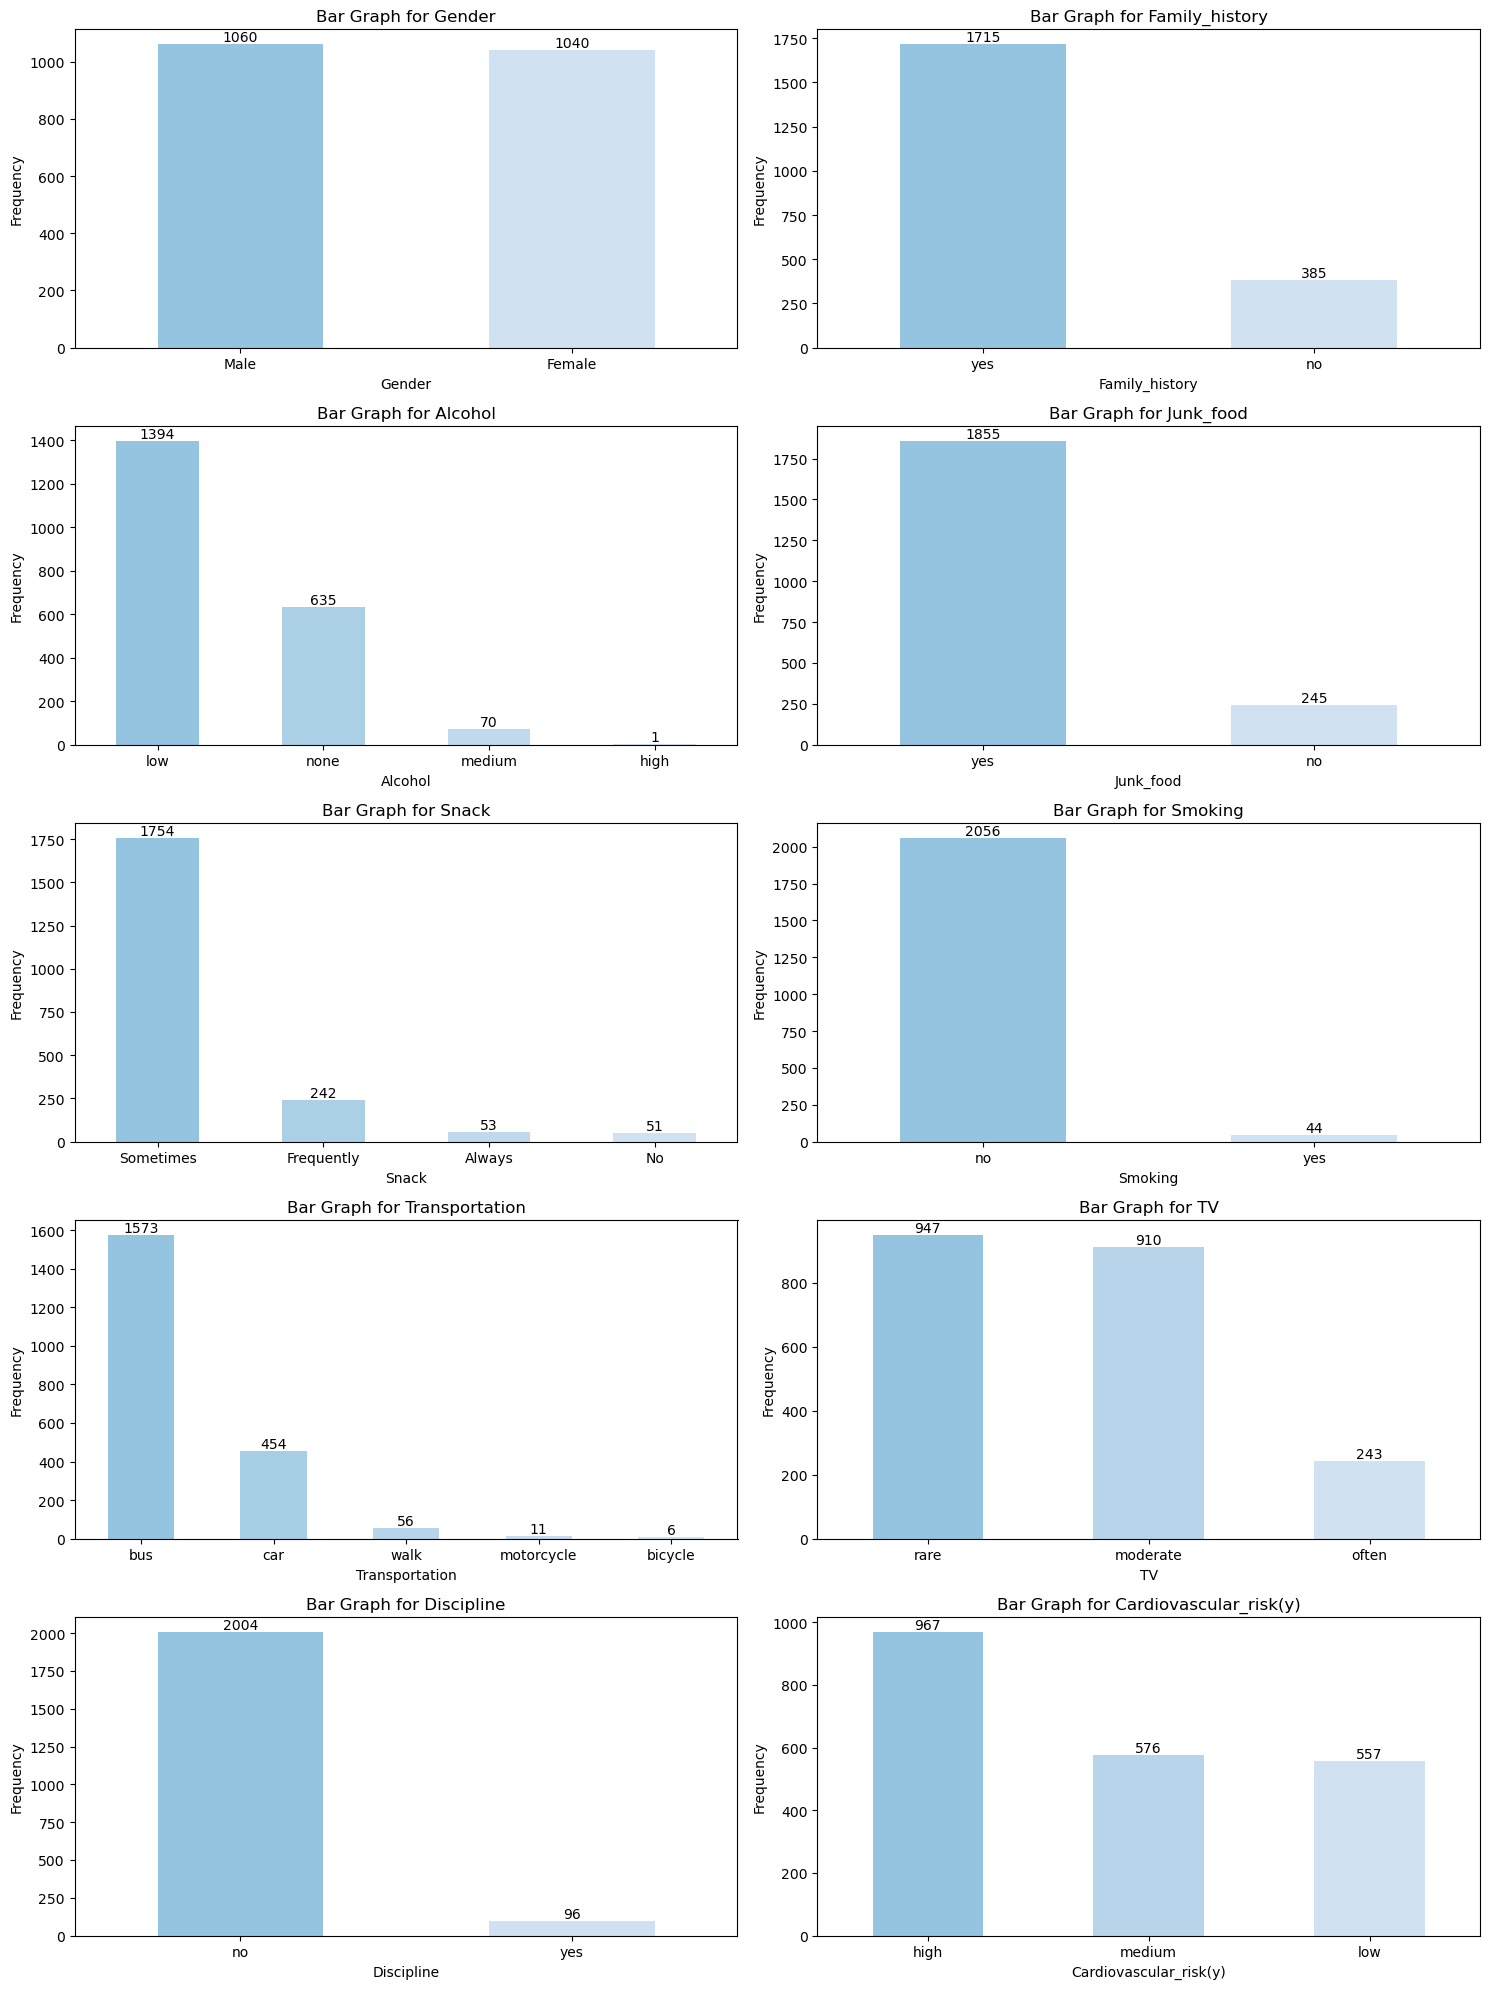

In [9]:
plot_categorical_bargraphs(dataset)

---

# Encode the ordinal data using Ordinal Encoder

In [10]:
from sklearn.preprocessing import OrdinalEncoder

cardio_categories = ['low', 'medium', 'high']
alcohol_categories = ['none', 'low', 'medium', 'high']
snack_categories = ['No', 'Sometimes', 'Frequently', 'Always']
tv_categories = ['rare', 'moderate', 'often']

data_ordinal = dataset[['Alcohol', 'Snack', 'TV',"Cardiovascular_risk(y)"]]
dataset_tr = dataset.drop(['Alcohol', 'Snack', 'TV',"Cardiovascular_risk(y)"], axis=1)

ordinal_encoder = OrdinalEncoder(categories=[alcohol_categories, snack_categories, tv_categories,cardio_categories])
data_ordinal = ordinal_encoder.fit_transform(data_ordinal)

data_ordinal = pd.DataFrame(data_ordinal.astype(int), columns=['Alcohol', 'Snack', 'TV',"Cardiovascular_risk(y)"])
dataset_tr = pd.concat([dataset_tr, data_ordinal], axis=1)

dataset_tr.info()
dataset_tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Junk_food               2100 non-null   object 
 6   Vege_day                2100 non-null   int64  
 7   Meals_day               2100 non-null   int64  
 8   Smoking                 2100 non-null   object 
 9   Water_intake(L)         2100 non-null   float64
 10  Transportation          2100 non-null   object 
 11  Exercise                2100 non-null   int64  
 12  Income                  2100 non-null   int64  
 13  Discipline              2100 non-null   object 
 14  Alcohol                 2100 non-null   

,Gender,Age,Height(cm),Weight(kg),Family_history,Junk_food,Vege_day,Meals_day,Smoking,Water_intake(L),Transportation,Exercise,Income,Discipline,Alcohol,Snack,TV,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,yes,3,3,no,2.72,car,3,2081,no,1,1,0,1
1,Female,19,175.3,80.0,yes,yes,2,1,no,2.65,bus,3,5551,no,0,1,1,1
2,Female,43,158.3,81.9,yes,yes,3,1,no,1.89,car,1,14046,no,0,1,0,2
3,Female,23,165.0,70.0,yes,no,2,1,no,2.00,bus,0,9451,no,1,1,0,1
4,Male,23,169.0,75.0,yes,yes,3,3,no,2.82,bus,1,17857,no,1,1,2,1


# Correlation Heatmap of Numerical Features

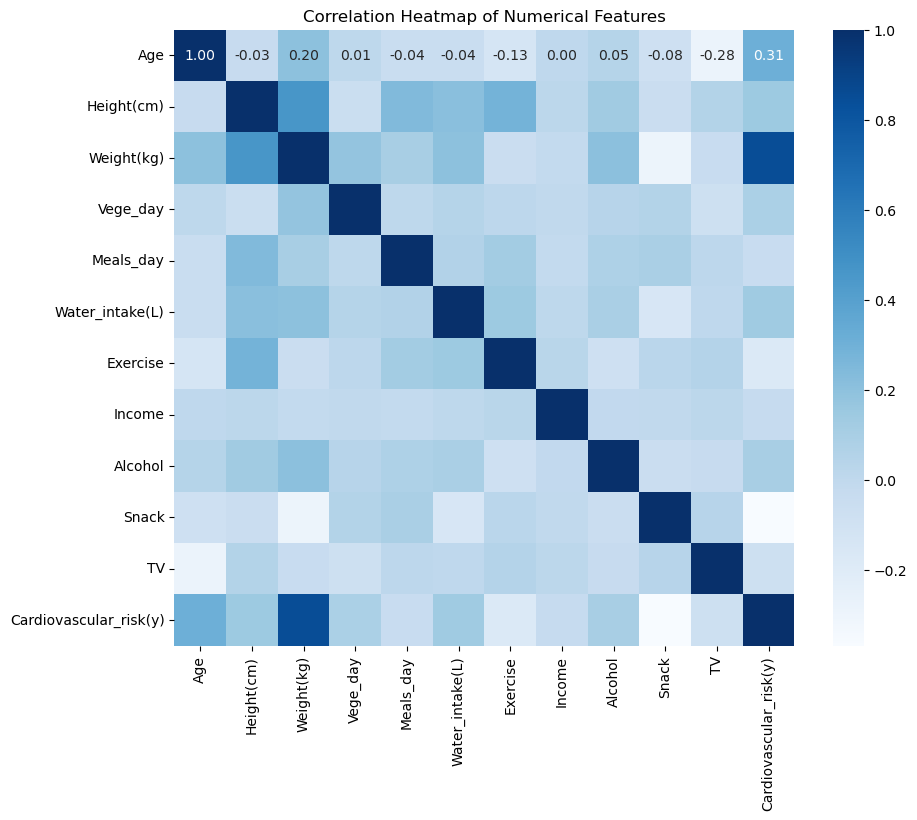

In [11]:
import seaborn as sns

# Compute pairwise correlation of numerical columns
corr_matrix = dataset_tr.select_dtypes(include=[float, int])

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix.corr(), annot=True, cmap="Blues" , fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### From above heatmap, we found that there is a strong relationship between Height and Weight, thus we create new feature BMI. [ This significantly increase accuracy from our experiment ]

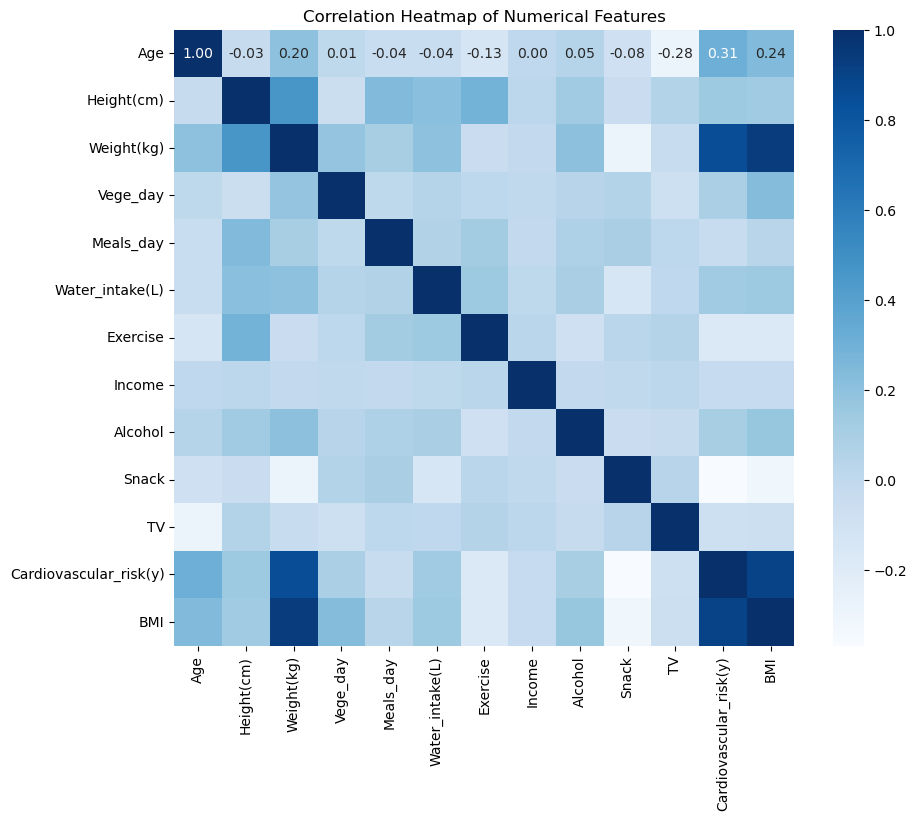

In [12]:
dataset_tr["BMI"] = dataset_tr["Weight(kg)"]/((dataset_tr["Height(cm)"]/100)**2)

# Compute pairwise correlation of numerical columns
new_corr_matrix = dataset_tr.select_dtypes(include=[float, int])

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(new_corr_matrix.corr(), annot=True, cmap="Blues" , fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

---

# Seperate output vector (y) from input matrix (X)

In [13]:
X = dataset_tr.drop(["Cardiovascular_risk(y)"],axis=1)
y = dataset_tr["Cardiovascular_risk(y)"]

print("X: shape=",X.shape)
print("y: shape=",y.shape)

X: shape= (2100, 18)
y: shape= (2100,)


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2100 non-null   object 
 1   Age              2100 non-null   int64  
 2   Height(cm)       2100 non-null   float64
 3   Weight(kg)       2100 non-null   float64
 4   Family_history   2100 non-null   object 
 5   Junk_food        2100 non-null   object 
 6   Vege_day         2100 non-null   int64  
 7   Meals_day        2100 non-null   int64  
 8   Smoking          2100 non-null   object 
 9   Water_intake(L)  2100 non-null   float64
 10  Transportation   2100 non-null   object 
 11  Exercise         2100 non-null   int64  
 12  Income           2100 non-null   int64  
 13  Discipline       2100 non-null   object 
 14  Alcohol          2100 non-null   int64  
 15  Snack            2100 non-null   int64  
 16  TV               2100 non-null   int64  
 17  BMI           

# Split dataset into training and testing set

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

print ("Full shape =", X.shape)
print ("Train shape =", X_train.shape)
print ("Test shape =", X_test.shape)

Full shape = (2100, 18)
Train shape = (1680, 18)
Test shape = (420, 18)


# Split X into numerical and categorical set

In [16]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_train_cat = X_train.select_dtypes(exclude=[np.number])

X_train_num.info()
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1680 entries, 1062 to 1829
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1680 non-null   int64  
 1   Height(cm)       1680 non-null   float64
 2   Weight(kg)       1680 non-null   float64
 3   Vege_day         1680 non-null   int64  
 4   Meals_day        1680 non-null   int64  
 5   Water_intake(L)  1680 non-null   float64
 6   Exercise         1680 non-null   int64  
 7   Income           1680 non-null   int64  
 8   Alcohol          1680 non-null   int64  
 9   Snack            1680 non-null   int64  
 10  TV               1680 non-null   int64  
 11  BMI              1680 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 170.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1680 entries, 1062 to 1829
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ge

In [17]:
X_test_num = X_test.select_dtypes(include=[np.number])
X_test_cat = X_test.select_dtypes(exclude=[np.number])

X_test_num.info()
X_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 1071 to 122
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              420 non-null    int64  
 1   Height(cm)       420 non-null    float64
 2   Weight(kg)       420 non-null    float64
 3   Vege_day         420 non-null    int64  
 4   Meals_day        420 non-null    int64  
 5   Water_intake(L)  420 non-null    float64
 6   Exercise         420 non-null    int64  
 7   Income           420 non-null    int64  
 8   Alcohol          420 non-null    int64  
 9   Snack            420 non-null    int64  
 10  TV               420 non-null    int64  
 11  BMI              420 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 42.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 1071 to 122
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender 

---

# Standardisation of numerical set

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_tr = scaler.fit_transform(X_train_num)
X_test_num_tr = scaler.transform(X_test_num)

### Check the result of the operation

In [19]:
print("Mean of all columns:")
print(X_train_num_tr.mean(axis=0))
print("Standard deviation of all columns:")
print(X_train_num_tr.std(axis=0))
print('X_train_num_tr shape:', X_train_num_tr.shape)

Mean of all columns:
[-1.98782789e-16  1.10440757e-15  5.64627710e-16 -1.34284118e-16
 -7.19001578e-17  3.21436000e-16  1.01506105e-16 -1.52259158e-16
  9.93913946e-17  4.28228881e-17 -5.49824736e-17 -3.90164092e-16]
Standard deviation of all columns:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_train_num_tr shape: (1680, 12)


# Encoding categorical data

In [20]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop="if_binary",sparse_output=False)

# Fit and transform the categorical columns
X_train_cat_tr = one_hot_encoder.fit_transform(X_train_cat)
X_test_cat_tr = one_hot_encoder.transform(X_test_cat)

# Convert the encoded array to integers
X_train_cat_tr = X_train_cat_tr.astype(int)
X_test_cat_tr = X_test_cat_tr.astype(int)

# Get the feature names for the encoded columns
feature_names = one_hot_encoder.get_feature_names_out(X_train_cat.columns)

# Convert the encoded array back to a DataFrame
X_train_cat_tr = pd.DataFrame(X_train_cat_tr, columns=feature_names, index=X_train.index)
X_test_cat_tr = pd.DataFrame(X_test_cat_tr, columns=feature_names, index=X_test.index)

In [21]:
X_train_cat_tr.head()

,Gender_Male,Family_history_yes,Junk_food_yes,Smoking_yes,Transportation_bicycle,Transportation_bus,Transportation_car,Transportation_motorcycle,Transportation_walk,Discipline_yes
1062,0,1,1,0,0,0,1,0,0,0
1467,0,1,1,0,0,1,0,0,0,0
2077,1,0,1,0,0,0,1,0,0,0
1066,0,1,1,0,0,1,0,0,0,0
692,1,1,1,0,0,1,0,0,0,0


---

# Finalise the training and testing set

In [120]:
print('X_train_num_tr shape:', X_train_num_tr.shape)
print('X_test_num_tr shape:', X_test_num_tr.shape)

X_train_num_tr shape: (1680, 12)
X_test_num_tr shape: (420, 12)


In [121]:
print('X_train_cat_tr shape:', X_train_cat_tr.shape)
print('X_test_cat_tr shape:', X_test_cat_tr.shape)

X_train_cat_tr shape: (1680, 10)
X_test_cat_tr shape: (420, 10)


In [22]:
X_train_tr = np.hstack([X_train_num_tr,X_train_cat_tr])
X_test_tr = np.hstack([X_test_num_tr,X_test_cat_tr])

print('X_train_tr shape:', X_train_tr.shape)
print('X_test_tr shape:', X_test_tr.shape)
print('y_train shape:', y_train.shape)

X_train_tr shape: (1680, 22)
X_test_tr shape: (420, 22)
y_train shape: (1680,)


---

# 1. Random Forest Classifier

## Model Training & Validation

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train_tr, y_train)

RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = forest.predict(X_train_tr)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       464
           2       1.00      1.00      1.00       781

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

[[435   0   0]
 [  0 464   0]
 [  0   0 781]]


### Cross-validation Prediction

In [25]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(forest, X_train_tr, y_train, cv=5)

print("Accuracy:", accuracy_score(y_train, y_pred_cv))
print(classification_report(y_train, y_pred_cv))
print(confusion_matrix(y_train, y_pred_cv))

Accuracy: 0.9970238095238095
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      0.99      0.99       464
           2       1.00      1.00      1.00       781

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

[[434   1   0]
 [  2 460   2]
 [  0   0 781]]


## Model Tuning & Testing
### Perform Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25,50,75,100],
    'max_depth': [None,5,10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = "accuracy", n_jobs=-1, verbose=2)

grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy', verbose=2)

In [27]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_forest = grid_search.best_estimator_

Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 25}
Best cross-validation accuracy: 0.9976


### Test the best model with testing set

In [28]:
y_pred = best_forest.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9904761904761905
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       0.99      0.97      0.98       112
           2       1.00      0.99      1.00       186

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420

[[122   0   0]
 [  3 109   0]
 [  0   1 185]]


## Drop unimportant features

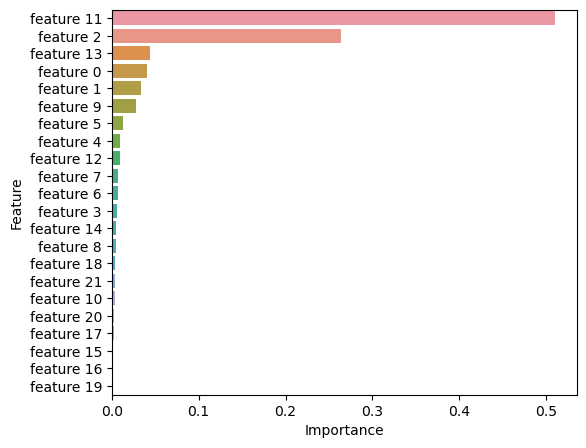

In [69]:
feature_importances = best_forest.feature_importances_
feature_names = [f"feature {i}" for i in range(X_train_tr.shape[1])]
feature_rf = pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})
feature_rf.sort_values(by='Importance',ascending=False,inplace=True)
plt.figure(figsize=(6,5))
sns.barplot(x="Importance",y='Feature',data=feature_rf)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [70]:
for i in {19, 16, 15, 17, 20, 10, 21, 18, 8, 14, 3, 6}:
    X_train_forest_dropped = np.delete(X_train_tr, i, axis=1)
    X_test_forest_dropped = np.delete(X_test_tr, i, axis=1)

best_forest.fit(X_train_forest_dropped, y_train)
y_pred = best_forest.predict(X_test_forest_dropped)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9928571428571429
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.97      0.99       112
           2       1.00      1.00      1.00       186

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420

[[122   0   0]
 [  3 109   0]
 [  0   0 186]]


---

# 2. Logistic Regression

## Model Training & Validation

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class="multinomial")
log_reg.fit(X_train_tr,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_reg.predict(X_train_tr)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.9910714285714286
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       435
           1       0.97      1.00      0.98       464
           2       1.00      1.00      1.00       781

    accuracy                           0.99      1680
   macro avg       0.99      0.99      0.99      1680
weighted avg       0.99      0.99      0.99      1680

[[425  10   0]
 [  2 462   0]
 [  0   3 778]]


### Cross-validation Prediction

In [32]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(log_reg, X_train_tr, y_train, cv=5)

print("Accuracy:", accuracy_score(y_train, y_pred_cv))
print(classification_report(y_train, y_pred_cv))
print(confusion_matrix(y_train, y_pred_cv))

Accuracy: 0.981547619047619
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       435
           1       0.95      0.98      0.97       464
           2       1.00      0.99      0.99       781

    accuracy                           0.98      1680
   macro avg       0.98      0.98      0.98      1680
weighted avg       0.98      0.98      0.98      1680

[[418  17   0]
 [  6 457   1]
 [  0   7 774]]


## Model Tuning & Testing
### Perform Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'saga'],  # Solvers compatible with multinomial
    'penalty': ['l2'],  # 'l2' penalty is generally used with the above solvers
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring = "accuracy", n_jobs=-1, verbose=2)

grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ...C=0.01, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END ...C=0.01, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END ...C=0.01, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END ....C=0.01, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END ....C=0.01, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END ...C=0.01, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END ...C=0.01, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END ....C=0.01, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END ....C=0.01, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.1s
[CV] END ....C=0.01, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.1s
[CV] END .....C=0.01, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END .....C=0.01, penalty=l2, solver=newton

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........C=100, penalty=l2, solver=saga, tol=0.01; total time=   0.1s
[CV] END ...........C=100, penalty=l2, solver=saga, tol=0.01; total time=   0.1s
[CV] END ..........C=10, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END ...........C=100, penalty=l2, solver=saga, tol=0.01; total time=   0.1s
[CV] END .........C=100, penalty=l2, solver=saga, tol=0.0001; total time=   1.7s
[CV] END ..........C=100, penalty=l2, solver=saga, tol=0.001; total time=   0.4s
[CV] END .........C=100, penalty=l2, solver=saga, tol=0.0001; total time=   1.6s
[CV] END ..........C=100, penalty=l2, solver=saga, tol=0.001; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy', verbose=2)

In [34]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_logreg = grid_search.best_estimator_

Best parameters found: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
Best cross-validation accuracy: 0.9923


### Test the best model with testing set

In [35]:
y_pred = best_logreg.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9809523809523809
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       122
           1       0.96      0.97      0.96       112
           2       0.99      1.00      1.00       186

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420

[[117   5   0]
 [  2 109   1]
 [  0   0 186]]


## Drop unimportant features

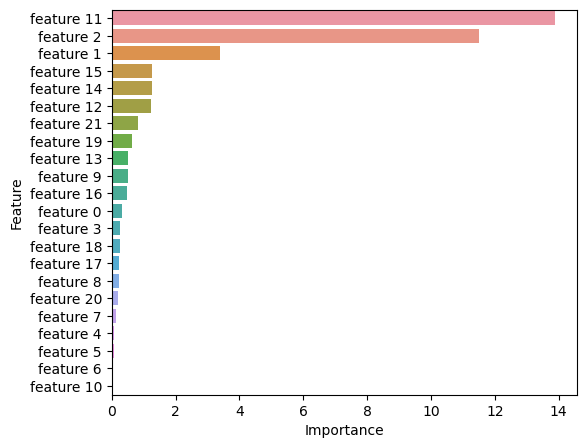

In [63]:
feature_importances = np.abs(best_logreg.coef_[0])
feature_names = [f"feature {i}" for i in range(X_train_tr.shape[1])]
feature_rf = pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})
feature_rf.sort_values(by='Importance',ascending=False,inplace=True)

plt.figure(figsize=(6,5))
sns.barplot(x="Importance",y='Feature',data=feature_rf)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [64]:
for i in {10, 6, 5, 4, 7, 20, 8, 17, 18, 3, 0, 16}:
    X_train_logreg_dropped = np.delete(X_train_tr, i, axis=1)
    X_test_logreg_dropped = np.delete(X_test_tr, i, axis=1)

best_logreg.fit(X_train_logreg_dropped, y_train)
y_pred = best_logreg.predict(X_test_logreg_dropped)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9833333333333333
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       122
           1       0.96      0.97      0.97       112
           2       0.99      1.00      1.00       186

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420

[[118   4   0]
 [  2 109   1]
 [  0   0 186]]


---

# 3. Support Vector Machine SVM

## Model Training & Validation

In [36]:
from sklearn.svm import SVC

svm = SVC(kernel = "linear", C=1.0, random_state=42)
svm.fit(X_train_tr, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm.predict(X_train_tr)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.9958333333333333
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       435
           1       0.99      1.00      0.99       464
           2       1.00      1.00      1.00       781

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

[[430   5   0]
 [  0 463   1]
 [  0   1 780]]


### Cross-validation Prediction

In [38]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(svm, X_train_tr, y_train, cv=5)

print("Accuracy:", accuracy_score(y_train, y_pred_cv))
print(classification_report(y_train, y_pred_cv))
print(confusion_matrix(y_train, y_pred_cv))

Accuracy: 0.9875
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       435
           1       0.97      0.98      0.98       464
           2       1.00      1.00      1.00       781

    accuracy                           0.99      1680
   macro avg       0.99      0.99      0.99      1680
weighted avg       0.99      0.99      0.99      1680

[[424  11   0]
 [  4 457   3]
 [  0   3 778]]


## Model Tuning & Testing
### Perform Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient (used in 'rbf', 'poly')
    'degree': [3, 4, 5]  # Degree of the polynomial kernel function ('poly')
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring = "accuracy", n_jobs=-1, verbose=2)

grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..........C=0.1, degree=3, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..........C=0.1, degree=3, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.1, degree=3, gamma=scal

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [40]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_svm = grid_search.best_estimator_

Best parameters found: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.9923


### Test the best model with testing set

In [41]:
y_pred = best_svm.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9809523809523809
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       122
           1       0.96      0.96      0.96       112
           2       0.99      0.99      0.99       186

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420

[[119   3   0]
 [  2 108   2]
 [  0   1 185]]


## Drop unimportant features

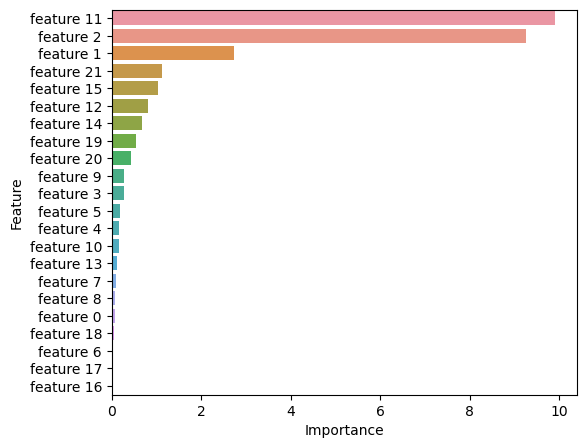

In [65]:
feature_importances = np.abs(best_svm.coef_[0])
feature_names = [f"feature {i}" for i in range(X_train_tr.shape[1])]
feature_rf = pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})
feature_rf.sort_values(by='Importance',ascending=False,inplace=True)

plt.figure(figsize=(6,5))
sns.barplot(x="Importance",y='Feature',data=feature_rf)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [66]:
for i in {16, 17, 6, 18, 0, 8, 7, 13, 10, 4, 5, 3}:
    X_train_svm_dropped = np.delete(X_train_tr, i, axis=1)
    X_test_svm_dropped = np.delete(X_test_tr, i, axis=1)

best_svm.fit(X_train_svm_dropped, y_train)
y_pred = best_svm.predict(X_test_svm_dropped)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9809523809523809
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       122
           1       0.96      0.96      0.96       112
           2       0.99      0.99      0.99       186

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420

[[119   3   0]
 [  2 108   2]
 [  0   1 185]]


---

# 4. Gradient Boosting Classifier

## Model Training & Validation

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_tr, y_train)

GradientBoostingClassifier()

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = gbc.predict(X_train_tr)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       464
           2       1.00      1.00      1.00       781

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

[[435   0   0]
 [  0 464   0]
 [  0   0 781]]


### Cross-validation Prediction

In [44]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(gbc, X_train_tr, y_train, cv=5)

print("Accuracy:", accuracy_score(y_train, y_pred_cv))
print(classification_report(y_train, y_pred_cv))
print(confusion_matrix(y_train, y_pred_cv))

Accuracy: 0.9910714285714286
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       435
           1       0.98      0.98      0.98       464
           2       1.00      1.00      1.00       781

    accuracy                           0.99      1680
   macro avg       0.99      0.99      0.99      1680
weighted avg       0.99      0.99      0.99      1680

[[431   4   0]
 [  6 456   2]
 [  0   3 778]]


## Model Tuning & Testing
### Perform Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
}

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring = "accuracy", n_jobs=-1, verbose=2)

grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   4.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   4.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   5.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   3.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   4.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [46]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_gbc = grid_search.best_estimator_

Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation accuracy: 0.9940


### Test the best model with testing set

In [47]:
y_pred = best_gbc.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9904761904761905
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       0.99      0.97      0.98       112
           2       1.00      0.99      1.00       186

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420

[[122   0   0]
 [  3 109   0]
 [  0   1 185]]


## Drop unimportant features

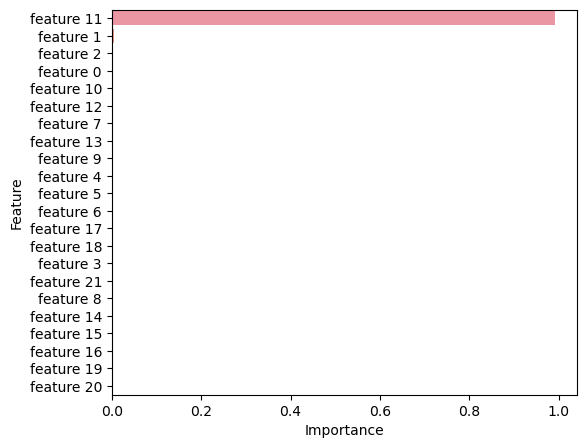

In [252]:
feature_importances = best_gbc.feature_importances_
feature_names = [f"feature {i}" for i in range(X_train_tr.shape[1])]
feature_rf = pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})
feature_rf.sort_values(by='Importance',ascending=False,inplace=True)

plt.figure(figsize=(6,5))
sns.barplot(x="Importance",y='Feature',data=feature_rf)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [253]:
for i in {20, 19, 16, 15, 14, 8, 21, 3, 18, 17, 6, 5}:
    X_train_gbc_dropped = np.delete(X_train_tr, i, axis=1)
    X_test_gbc_dropped = np.delete(X_test_tr, i, axis=1)

best_gbc.fit(X_train_gbc_dropped, y_train)
y_pred = best_gbc.predict(X_test_gbc_dropped)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9904761904761905
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       0.99      0.97      0.98       112
           2       1.00      0.99      1.00       186

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420

[[122   0   0]
 [  3 109   0]
 [  0   1 185]]


---

# 5. Gaussian Naive Bayes

## Model Training & Validation

In [48]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_tr, y_train)

GaussianNB()

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = gnb.predict(X_train_tr)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.7398809523809524
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       435
           1       0.82      0.35      0.49       464
           2       0.67      0.97      0.79       781

    accuracy                           0.74      1680
   macro avg       0.80      0.69      0.70      1680
weighted avg       0.77      0.74      0.72      1680

[[322  19  94]
 [ 26 162 276]
 [  5  17 759]]


### Cross-validation Prediction

In [51]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(gnb, X_train_tr, y_train, cv=5)

print("Accuracy:", accuracy_score(y_train, y_pred_cv))
print(classification_report(y_train, y_pred_cv))
print(confusion_matrix(y_train, y_pred_cv))

Accuracy: 0.7511904761904762
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       435
           1       0.78      0.43      0.55       464
           2       0.69      0.97      0.81       781

    accuracy                           0.75      1680
   macro avg       0.80      0.70      0.72      1680
weighted avg       0.78      0.75      0.74      1680

[[305  38  92]
 [ 18 200 246]
 [  5  19 757]]


## Model Tuning & Testing
### Perform Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter
}

grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring = "accuracy", n_jobs=-1, verbose=2)

grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoo

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy', verbose=2)

In [53]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_gnb = grid_search.best_estimator_

Best parameters found: {'var_smoothing': 1e-05}
Best cross-validation accuracy: 0.7935


### Test the best model with testing set

In [54]:
y_pred = best_gnb.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       122
           1       0.78      0.28      0.41       112
           2       0.69      0.98      0.81       186

    accuracy                           0.77       420
   macro avg       0.80      0.72      0.71       420
weighted avg       0.79      0.77      0.73       420

[[109   6   7]
 [  5  31  76]
 [  1   3 182]]


---

# 6. Neural Networks

## Model Training & Validation

In [55]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=42, max_iter=1000)
nn.fit(X_train_tr, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = nn.predict(X_train_tr)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       464
           2       1.00      1.00      1.00       781

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

[[435   0   0]
 [  0 464   0]
 [  0   0 781]]


### Cross-validation Prediction

In [57]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(nn, X_train_tr, y_train, cv=5)

print("Accuracy:", accuracy_score(y_train, y_pred_cv))
print(classification_report(y_train, y_pred_cv))
print(confusion_matrix(y_train, y_pred_cv))

Accuracy: 0.9809523809523809
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       435
           1       0.96      0.97      0.97       464
           2       1.00      0.99      1.00       781

    accuracy                           0.98      1680
   macro avg       0.98      0.98      0.98      1680
weighted avg       0.98      0.98      0.98      1680

[[419  16   0]
 [ 11 452   1]
 [  0   4 777]]


## Model Tuning & Testing
### Perform Grid Search

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 100), (50, 50, 50)],  # Number of neurons in the hidden layers
    'activation': ['tanh', 'relu'],  # Activation function for the hidden layer
    'solver': ['sgd', 'adam'],  # Solver for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term (L2 penalty)
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
}

grid_search = GridSearchCV(nn, param_grid, cv=5, scoring = "accuracy", n_jobs=-1, verbose=2)

grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=   4.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learnin

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (100, 100),
                                                (50, 50, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=2)

In [59]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_nn = grid_search.best_estimator_

Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'solver': 'sgd'}
Best cross-validation accuracy: 0.9911


### Test the best model with testing set

In [60]:
y_pred = best_nn.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9857142857142858
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       122
           1       0.96      0.99      0.97       112
           2       1.00      0.99      1.00       186

    accuracy                           0.99       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.99      0.99      0.99       420

[[118   4   0]
 [  1 111   0]
 [  0   1 185]]


---

# Comparison

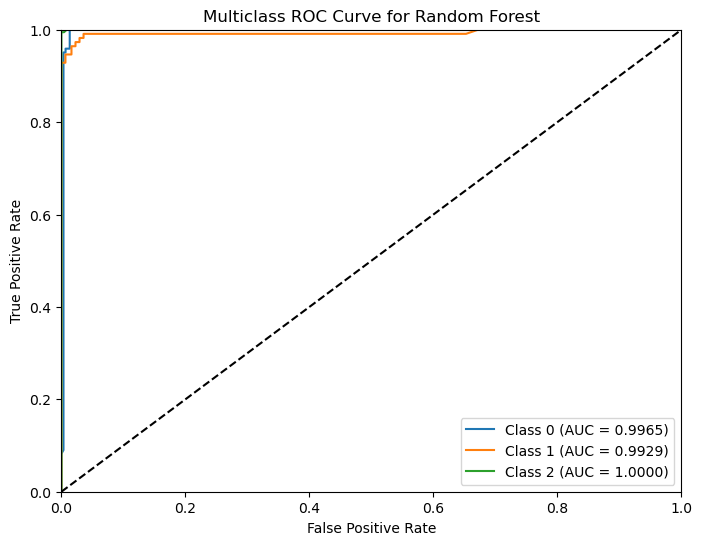

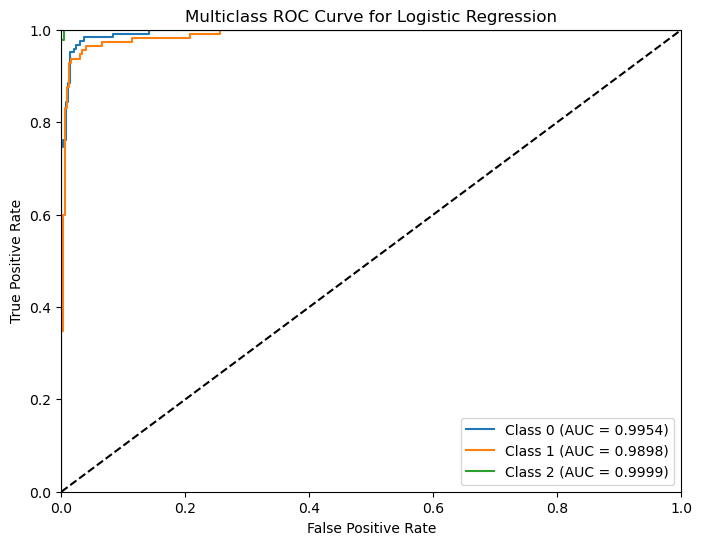

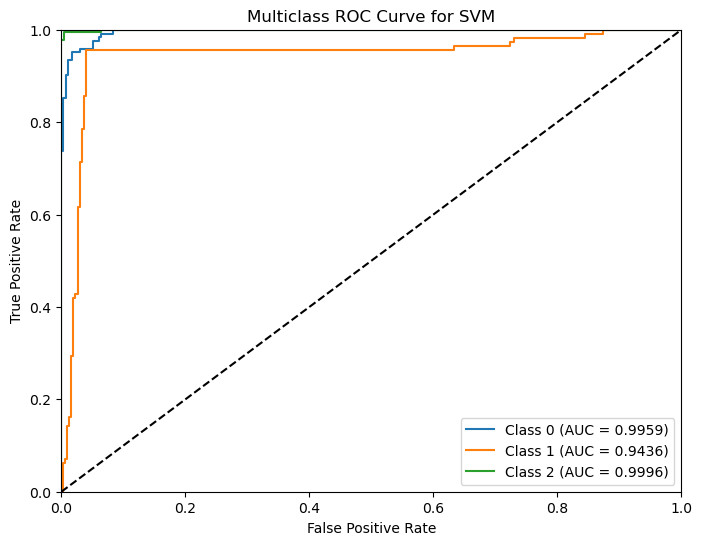

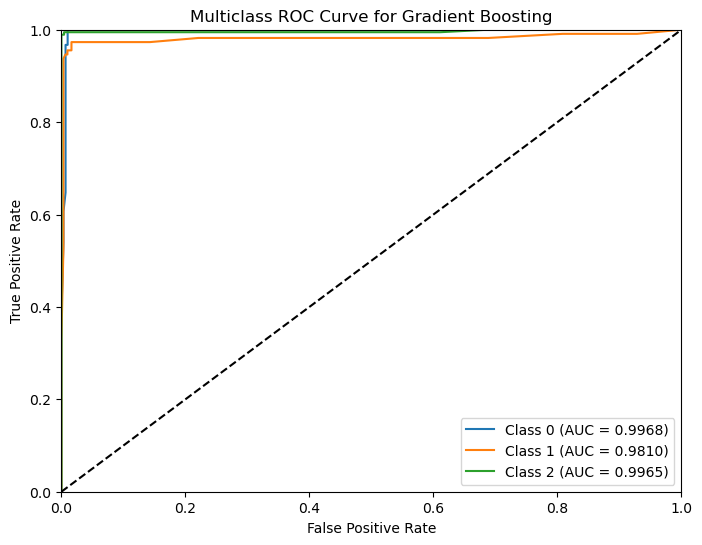

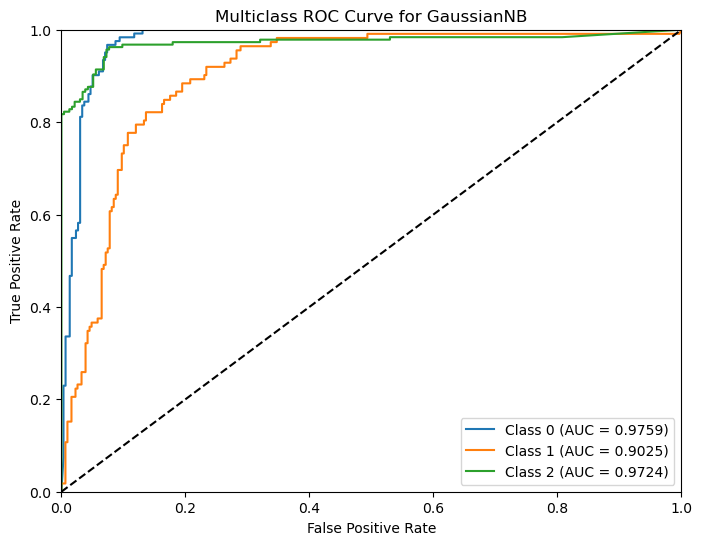

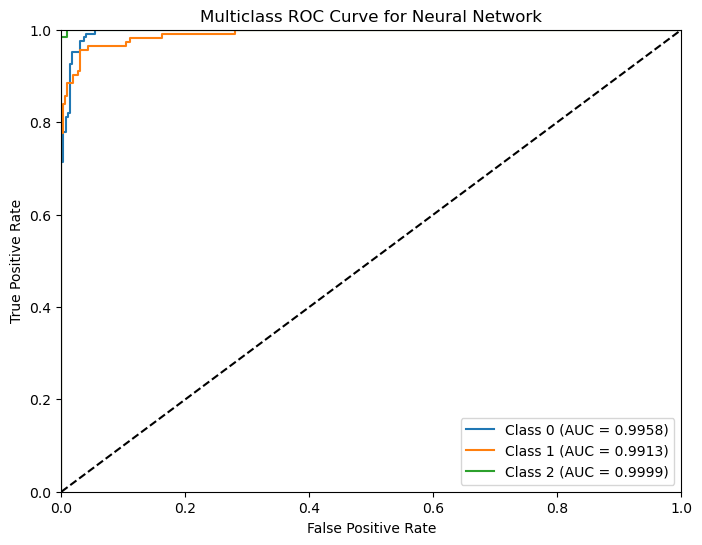

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))

# Binarize the output labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

y_scores_best_forest = cross_val_predict(best_forest, X_test_forest_dropped, y_test, cv=5, method="predict_proba")
y_scores_best_logreg = cross_val_predict(best_logreg, X_test_logreg_dropped, y_test, cv=5, method="predict_proba")
y_scores_best_svm = cross_val_predict(best_svm, X_test_tr, y_test, cv=5, method="decision_function")
y_scores_best_gbc = cross_val_predict(best_gbc, X_test_tr, y_test, cv=5, method="decision_function")
y_scores_best_gnb = cross_val_predict(best_gnb, X_test_tr, y_test, cv=5, method="predict_proba")
y_scores_best_nn = cross_val_predict(best_nn, X_test_tr, y_test, cv=5, method="predict_proba")

models = [
    ('Random Forest', y_scores_best_forest),
    ('Logistic Regression', y_scores_best_logreg),
    ('SVM', y_scores_best_svm),
    ('Gradient Boosting', y_scores_best_gbc),
    ('GaussianNB', y_scores_best_gnb),
    ('Neural Network', y_scores_best_nn)
]

# Create separate plots for each model
for model_name, y_scores in models:
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_scores[:, i]):.4f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multiclass ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

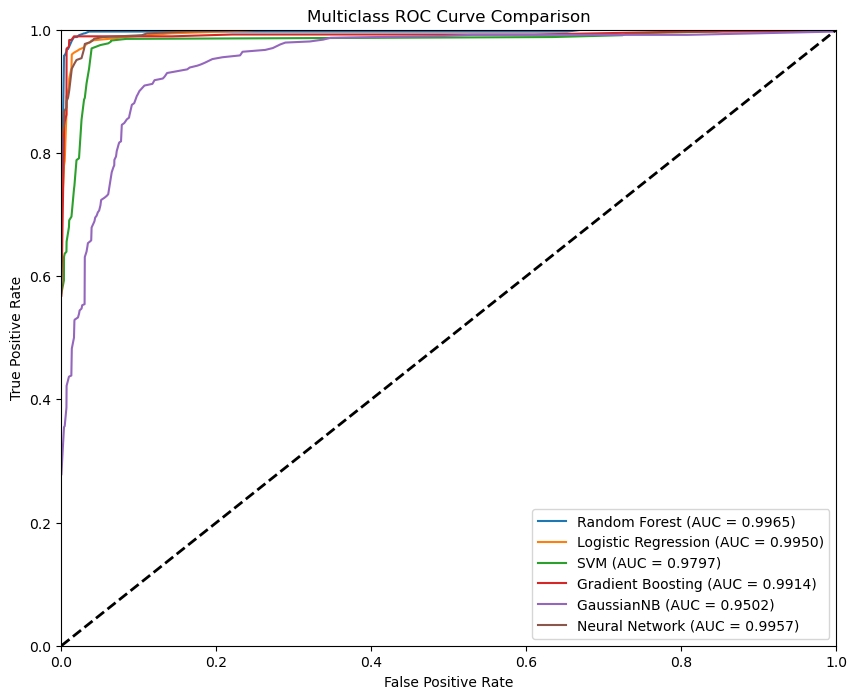

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_predict

# Assuming `y_test` and models are defined
n_classes = len(np.unique(y_test))

# Binarize the output labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Define the models and get the prediction probabilities or decision scores
models = [
    ('Random Forest', cross_val_predict(best_forest, X_test_forest_dropped, y_test, cv=5, method="predict_proba")),
    ('Logistic Regression', cross_val_predict(best_logreg, X_test_logreg_dropped, y_test, cv=5, method="predict_proba")),
    ('SVM', cross_val_predict(best_svm, X_test_tr, y_test, cv=5, method="decision_function")),
    ('Gradient Boosting', cross_val_predict(best_gbc, X_test_tr, y_test, cv=5, method="decision_function")),
    ('GaussianNB', cross_val_predict(best_gnb, X_test_tr, y_test, cv=5, method="predict_proba")),
    ('Neural Network', cross_val_predict(best_nn, X_test_tr, y_test, cv=5, method="predict_proba"))
]

# Initialize plot
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for model_name, y_scores in models:
    # Compute the macro-average ROC curve and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_scores[:, i])

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    macro_auc = roc_auc_score(y_test_binarized, y_scores, average="macro", multi_class="ovr")
    
    plt.plot(all_fpr, mean_tpr, label=f'{model_name} (AUC = {macro_auc:.4f})')

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [72]:
from sklearn.metrics import roc_auc_score

# Compute the AUC for all classes combined (macro-average)
auc_forest = roc_auc_score(y_test_binarized, y_scores_best_forest, average="macro", multi_class="ovr")
auc_logreg = roc_auc_score(y_test_binarized, y_scores_best_logreg, average="macro", multi_class="ovr")
auc_svm = roc_auc_score(y_test_binarized, y_scores_best_svm, average="macro", multi_class="ovr")
auc_gbc = roc_auc_score(y_test_binarized, y_scores_best_gbc, average="macro", multi_class="ovr")
auc_gnb = roc_auc_score(y_test_binarized, y_scores_best_gnb, average="macro", multi_class="ovr")
auc_nn = roc_auc_score(y_test_binarized, y_scores_best_nn, average="macro", multi_class="ovr")

# Print the combined AUC scores
print(f"Combined AUC for Random Forest: {auc_forest:.4f}")
print(f"Combined AUC for Logistic Regression: {auc_logreg:.4f}")
print(f"Combined AUC for SVM: {auc_svm:.4f}")
print(f"Combined AUC for Gradient Boosting: {auc_gbc:.4f}")
print(f"Combined AUC for GaussianNB: {auc_gnb:.4f}")
print(f"Combined AUC for Neural Network: {auc_nn:.4f}")

Combined AUC for Random Forest: 0.9965
Combined AUC for Logistic Regression: 0.9950
Combined AUC for SVM: 0.9797
Combined AUC for Gradient Boosting: 0.9914
Combined AUC for GaussianNB: 0.9502
Combined AUC for Neural Network: 0.9957


---